In [1]:
import pandas as pd
import numpy as np
import quantstats as qs
import matplotlib.pyplot as plt

# Data
- benchmark : 台灣加權股價指數(Y9999)
- Strategy : 台灣所有上市上櫃公司
- 類別 : 報酬率資料
- 時間 : 2010/01/01 ~ 2014/01/19

In [2]:
benchmark = pd.read_csv('Y9999.txt', sep='#', encoding='ANSI', low_memory=False)  # 讀取data
benchmark.columns = ['ticker','name', 'date', 'return']
benchmark['return'] /= 100  # 單位 : % -> 小數
benchmark['date'] = pd.to_datetime(benchmark['date'].astype(str))  # data type -> datetime64 (針對原始data，type(date)要先轉乘成str函數.to_datetime才能正確讀取
benchmark = benchmark.set_index('date')['return']
benchmark.name = 'benchmark'
benchmark

date
2010-01-04    0.002411
2010-01-05    0.000433
2010-01-06    0.014153
2010-01-07   -0.010831
2010-01-08    0.005278
                ...   
2024-01-15    0.001941
2024-01-16   -0.011395
2024-01-17   -0.010669
2024-01-18    0.003846
2024-01-19    0.026337
Name: benchmark, Length: 3453, dtype: float64

In [3]:
data = pd.read_csv('stock.txt', sep='#', encoding='ANSI', low_memory=False)  # 讀取data
data.columns = ['ticker', 'name', 'date', 'return', 'turnover', 'market_cap(million)']  # 改column名稱
data['return'] /= 100  # 單位 : % -> 小數
data['turnover'] /= 100  # 單位 : % -> 小數
data['ticker'] = data['ticker'].astype(str)  # type(ticker) -> str
data['date'] = pd.to_datetime(data['date'].astype(str))  # data type -> datetime64 (針對原始data，type(date)要先轉乘成str函數.to_datetime才能正確讀取)
data

,ticker,name,date,return,turnover,market_cap(million)
0,1101,台泥,2010-01-04,0.008824,0.002521,112921
1,1102,亞泥,2010-01-04,-0.001445,0.002186,103157
2,1103,嘉泥,2010-01-04,0.016575,0.008018,13208
3,1104,環泥,2010-01-04,0.051429,0.012449,11111
4,1108,幸福,2010-01-04,0.008939,0.008079,3654
...,...,...,...,...,...,...
5228803,9949,琉園,2024-01-18,0.000000,0.000341,744
5228804,9950,萬國通,2024-01-18,0.000000,0.001902,3354
5228805,9951,皇田,2024-01-18,-0.005706,0.002817,5221
5228806,9960,邁達康,2024-01-18,0.005650,0.000566,897


In [4]:
return_df = data.pivot(index='date', columns='ticker', values='return').copy()  # 調整data方便後續分析(使用copy可以不修改原始data)
return_df

ticker,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.008824,-0.001445,0.016575,0.051429,0.008939,0.014286,0.022026,-0.014908,-0.005825,-0.004261,...,0.017308,0.012911,-0.011194,-0.006098,0.011204,0.007599,0.022508,0.044898,-0.036789,-0.006135
2010-01-05,0.034985,0.021708,-0.005435,-0.016304,-0.007752,0.004695,0.008621,0.001164,-0.001953,0.001427,...,-0.020794,0.001159,-0.003774,-0.003067,0.008310,-0.025641,-0.012579,-0.042969,0.006944,-0.012346
2010-01-06,0.021127,0.007082,-0.016393,0.008287,-0.001116,0.009346,0.012821,0.000000,0.005871,0.017094,...,0.003861,0.011574,-0.011364,-0.004615,0.024725,-0.004644,0.014331,0.024490,0.068966,0.000000
2010-01-07,-0.019310,-0.011252,-0.016667,-0.024658,0.016760,0.004630,-0.004219,-0.002326,-0.011673,-0.016807,...,0.015385,-0.017162,0.000000,-0.020093,0.008043,-0.007776,-0.017268,-0.011952,-0.006452,0.000000
2010-01-08,-0.004219,0.005690,0.014124,0.005618,0.010989,0.000000,0.008475,-0.009324,0.003937,0.008547,...,0.013258,-0.001164,-0.003831,-0.028391,-0.034574,0.006270,-0.001597,0.016129,0.008117,-0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-12,0.001484,-0.003676,0.000000,0.001715,0.003236,-0.002762,-0.002639,0.000000,-0.012069,0.003521,...,0.002488,-0.002703,0.002439,-0.011628,-0.014218,0.000000,0.002123,-0.013055,0.001876,0.000000
2024-01-15,-0.002963,0.000000,-0.005348,-0.006849,-0.003226,-0.002770,-0.005291,0.002653,-0.010471,0.017544,...,-0.002481,0.002710,0.017032,0.000000,-0.007212,0.000000,0.010593,0.076720,0.003745,-0.002747
2024-01-16,-0.022288,-0.017220,-0.024194,-0.013793,-0.016181,-0.011111,-0.026596,-0.013228,-0.001764,-0.010345,...,0.000000,-0.029730,-0.007177,0.002941,-0.029056,-0.005602,0.000000,0.004914,-0.003731,-0.013774


# Strategy

In [5]:
def map_to_percentiles(data:pd.Series, min_counts:int=1) -> pd.Series:
    '''
    功能 : 計算data values的百分位數(mapping to [0,1])
    參數 :
        1. data : 預計算百分位數的data，type=pd.Series
        2. min_counts : 閾值，若data數目<mincount則return nan，default=1，type=int
    輸出 :
        data : 百分位數data，type=pd.Series
    '''
    # 複製原來的data，避免修改到原data
    data = data.copy() 
    
    # 找出所有非零的數據(有效data)
    valid_indices = ~np.isnan(data)  # True=1；False=0
    
    # 有效data數目<min_counts則return全為nan的series，長度=data，index跟data相同
    if np.sum(valid_indices)<min_counts:
        return pd.Series([np.nan]*len(data), index=data.index)
        
    # 計算百分位數
    # 找到有效數值的最小值和最大值
    min_val = np.min(data[valid_indices])
    max_val = np.max(data[valid_indices])

    # 將有效數值轉換為百分位數(mapping to [0,1])
    data[valid_indices] = (data[valid_indices] - min_val) / (max_val - min_val)

    return data

In [6]:
def signal(data:pd.DataFrame, days:int, threshold:float, min_counts:int=1, min_periods:int=1) -> pd.DataFrame :
    '''
    功能 : 偵測反轉訊號，若過去days天股票累積報酬的百分位數超過threshold，則發出訊號
    參數 :
        1. data : 日報酬率資料，type=pd.DataFrame，index=date，columns=tickers
        2. days : 要取過去多少天計算累積報酬率，type=int
        3. threshold : 百分位數的閾值，累積報酬率超過多少才發出訊號，type=float
        4. min_counts : 有效股票數目的閾值。若data中當天有效股票數目(非零資料量)<mincount則return nan，default=1，type=int
        5. min_periods : 計算累積報酬率的閾值。若該股票過去資料量<min_periods則value=nan，default=1，type=int
    輸出 :
        reversal_signal : 訊號資料，有訊號value>0；無訊號value=0，type=pd.DataFrame
    '''
    # 複製原來的data，避免修改到原data
    data = data.copy()

    # 訊號處理
        # 計算所有股票過去days天累積報酬
    
    cum_ret_df = data.rolling(days, min_periods).sum()  # type=pd.DataFrame
    
        # 計算同一天所有累積報酬的百分位數(mapping to [0,1])
    for t in data.index :
        cum_ret_df.loc[t,:] = 1 - map_to_percentiles(cum_ret_df.loc[t,:], min_counts)  # type(ret)=pd.Series；type(percentiles_df)=pd.DataFrame
                                                                                       # map_to_percentile : 漲幅百分比
                                                                                       # 1 - map_to_percentile : 跌幅百分比

        # 偵測訊號
    reversal_signal = cum_ret_df - threshold  # 計算跌幅百分位數超過閾值的幅度，type=pd.DataFrame
    reversal_signal[ reversal_signal < 0 ] = 0  # 跌幅未超過閾值(<0)的value=0
    reversal_signal = reversal_signal.fillna(0)  # 將nan填0(避免後續影響計算return)

    return reversal_signal

In [7]:
def signal_topN(data:pd.DataFrame, days:int, N:int, min_counts:int=1, min_periods:int=1) -> pd.DataFrame :
    '''
    功能 : 偵測反轉訊號，只賦予data中過去days天跌幅最多的前N檔股票訊號
    參數 :
        1. data : 日報酬率資料，type=pd.DataFrame，index=date，columns=tickers
        2. days : 要取過去多少天計算累積報酬率，type=int
        3. threshold : 股票數目的閾值，固定買進過去跌幅最多的前N檔股票，type=float
        4. min_counts : 有效股票數目的閾值。若data中當天有效股票數目(非零資料量)<mincount則return nan，default=1，type=int
        5. min_periods : 計算累積報酬率的閾值。若該股票過去資料量<min_periods則value=nan，default=1，type=int
    輸出 :
        reversal_signal : 訊號資料，有訊號value<0；無訊號value=0，type=pd.DataFrame
    '''
    # 複製原來的data，避免修改到原data
    data = data.copy()

    # 訊號處理
        # 計算所有股票過去days天累積報酬
    cum_ret_df = data.rolling(days, min_periods).sum()  # type=pd.DataFrame

        # 偵測訊號
    for t in data.index :
        sorted_cum_ret = cum_ret_df.loc[t,:].sort_values()  # 漲幅排序 : 低->高  <-> 跌分排序 : 高 -> 低，type=pd.Series
        topN1 = sorted_cum_ret[N:N+1]  # 選取跌幅最多的第N+1檔股票，type=pd.Series
        cum_ret_df.loc[t,:] = cum_ret_df.loc[t,:] - topN1.values  # value<0的股票即為跌幅最多的前N檔股票，type=pd.DataFrame
                                                                  # topN1通常<0，X - topN1 <0 -> X < topN1(跌幅>topN1)

        # 訊號數值
    cum_ret_df[ cum_ret_df >= 0 ] = 0  # 跌幅<=第N+1檔股票的signal=0
    reversal_signal = cum_ret_df.fillna(0)  # nan填0

    return reversal_signal

In [8]:
def normalize(data:pd.DataFrame) -> pd.DataFrame :
    '''
    功能 : 將data進行標準化，mapping to [0,1]
    參數 :
        data : 欲進行標準化的data，type=pd.DataFrame，index=date，columns=tickers
    輸出 :
        data : 標準化後的data，，type=pd.DataFrame，index=date，columns=tickers
    '''
    # 複製原來的data，避免修改到原data
    data = data.copy()

    # 標準化
    for t in data.index :
        sum_ = data.loc[t,:].sum()  # 計算當天總報酬
        sum_ = sum_ if sum_!= 0 else np.nan  # 避免分母(sum_)=0時下行code會報錯
        data.loc[t,:] = data.loc[t,:] / sum_  # 標準化當天各個data

    return data

# Backtest

In [9]:
def calc_turnover_rate(data:pd.DataFrame, weights:pd.DataFrame) -> pd.DataFrame :
    '''
    功能 : 計算投組中每個股票的日週轉率
    參數 : 
        1. data : 日報酬率資料，type=pd.DataFrame，index=date，columns=tickers
        2. weights : 投組權重，type=pd.DataFrame，index=date，columns=tickers
    輸出 :
        firm_turnover_rate : 投組中每個股票的日週轉率，type=pd.DataFrame，index=date，columns=tickers
    '''
    # 複製原來的data和weights，避免修改到原始資料
    data = data.copy()
    weights = weights.copy()

    # 計算每檔股票的週轉率
    weights = weights.fillna(0)  # nan填0避免影響下行code的計算
    weights_drift = weights.shift(1) * ( data.add(1) )
    weights_drift = normalize(weights_drift)  # 標準化，使權重介於0~1
    firm_turnover_rate = (weights_drift - weights).abs()  # 計算週轉率

    return firm_turnover_rate

In [10]:
def backtest(data:pd.DataFrame, weights:pd.DataFrame, transaction_cost:float) :
    '''
    功能 : 回測一組weights的績效
    輸入 :
        1. data : 日報酬率資料(原始data)，type=pd.DataFrame，index=date，columns=tickers
        2. weights : 欲回測的權重，由策略所計算出來，type=pd.DataFrame，index=date，columns=tickers
        3. transaction_cost : 單邊交易成本，台股抓0.002，type=float
    輸出 :
        1. strategy_gross_return : 略策歷史毛報酬，type=pd.Series
        2. strategy_net_return : 略策歷史淨報酬，type=pd.Series
    '''
    # 複製原來的data和weights，避免修改到原始資料
    data = data.copy()
    weights = weights.copy()

    # 交易成本
    firm_turnover_rate = calc_turnover_rate(data, weights)
    firm_transaction_cost = firm_turnover_rate * transaction_cost

    # 計算每檔股票報酬
    firm_gross_return = (weights.shift(1) * data).fillna(0)  # 每檔股票各自的毛報酬(未扣除交易成本)  
            # .shift(1)的原因為weights是用第t期以前的data所計算出來的，記為weights_t；持有股票的各自報酬率發生在t+1時期，記為data_t+1
            # 我們是在第t期收盤後計算策略權重，第t+1期一開盤買進，每檔股票各自報酬_t+1 = weights_t * data_t+1
            # fillna(0) : nan填0
    firm_net_return = firm_gross_return - firm_transaction_cost  # 每檔股票各自的淨報酬(扣除交易成本)

    # 計算策略報酬
    strategy_gross_return = firm_gross_return.sum(axis=1).fillna(0)  # 策略毛報酬(未扣除交易成本)，axis=1針對index(row)方向加總，計算每日策略報酬 
    strategy_net_return = firm_net_return.sum(axis=1).fillna(0)  # 策略淨報酬(扣除交易成本)
    
    return strategy_gross_return, strategy_net_return

In [11]:
reversal_signal = signal(data=return_df, days=63, threshold=0.9, min_counts=100, min_periods=63)  #偵測反轉訊號
reversal_weights = normalize(data=reversal_signal)  # 根據訊號決定持有權重(標準化權重到0~1)
reversal_weights.fillna(0)  # nan填0避免影響到報酬率計算
strategy_gross_return,  strategy_net_return = backtest(data=return_df, weights=reversal_weights, transaction_cost=0.002)  # 回測反轉策略績效

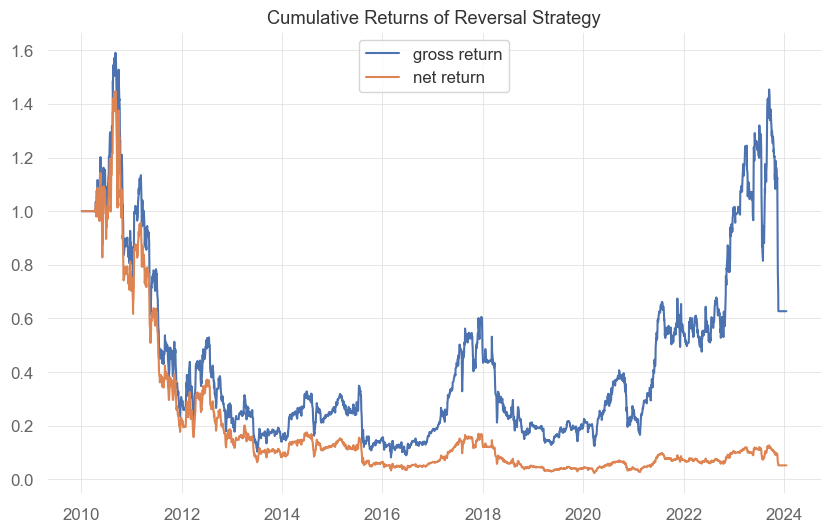

In [12]:
cum_strategy_gross_return = strategy_gross_return.add(1).cumprod()  # 累積毛報酬
cum_strategy_net_return = strategy_net_return.add(1).cumprod()  # 累積淨報酬
plt.title( 'Cumulative Returns of Reversal Strategy' )
gross_return_plot = plt.plot(cum_strategy_gross_return, label='gross return')  # 累積毛報酬的圖
net_return_plot = plt.plot(cum_strategy_net_return, label='net return')  # 累積淨報酬的圖
plt.legend()

In [13]:
# 毛報酬
gross_mean = strategy_gross_return.mean()*252  # 策略(算數)平均報酬
gross_std = strategy_gross_return.std()*(252**0.5)  # 策略標準差
gross_sharpe = gross_mean / gross_std  # 策略sharpe
gross_series = pd.Series([gross_mean, gross_std, gross_sharpe], index=['mean', 'std', 'sharpe'])

# 淨報酬
net_mean = strategy_net_return.mean()*252  # 策略(算數)平均報酬
net_std = strategy_net_return.std()*(252**0.5) # 策略標準差
net_sharpe = net_mean / net_std  # 策略sharpe
net_series = pd.Series([net_mean, net_std, net_sharpe], index=['mean', 'std', 'sharpe'])

pd.DataFrame( { 'gross':gross_series, 'net':net_series } )

,gross,net
mean,0.133069,-0.048747
std,0.579015,0.577323
sharpe,0.229819,-0.084437


# 參數最佳化 - days

<Axes: title={'center': 'Sharpe ratio for different time horizons'}, xlabel='time horizons'>

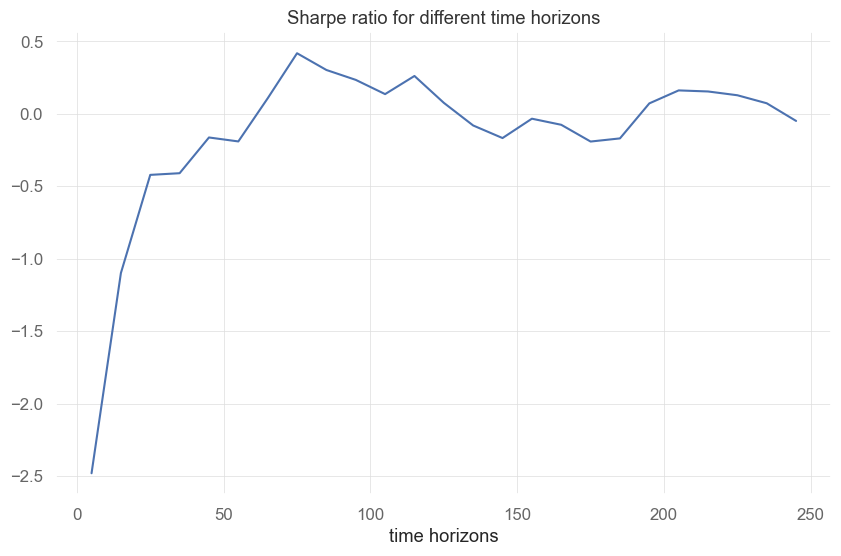

In [14]:
days_list = range(5,252,10)
sharpe_list = []
for d in days_list :
    reversal_signal_days_temp = signal(data=return_df, days=d, threshold=0.9, min_counts=100, min_periods=d)  #偵測反轉訊號
    reversal_weights_days_temp = normalize(data=reversal_signal_days_temp)  # 根據訊號決定持有權重
    strategy_gross_return_temp,  strategy_net_return_temp  = backtest(data=return_df, weights=reversal_weights_days_temp, transaction_cost=0.002)  # 回測反轉策略績效
    net_mean_temp = strategy_net_return_temp.mean()*252  # 策略(算數)平均報酬
    net_std_temp = strategy_net_return_temp.std()*(252**0.5)  # 策略標準差
    net_sharpe_temp = net_mean_temp / net_std_temp  # 策略sharpe
    sharpe_list.append(net_sharpe_temp)
pd.Series(sharpe_list, index = days_list).plot( title = 'Sharpe ratio for different time horizons', xlabel = 'time horizons')

In [15]:
# 依sharpe由大排到小
pd.Series(sharpe_list, index = days_list).sort_values(ascending=False)

75     0.418460
85     0.302996
115    0.261563
95     0.234717
205    0.161991
215    0.154616
105    0.136372
225    0.128503
65     0.107432
125    0.076260
235    0.073176
195    0.072343
155   -0.033345
245   -0.048738
165   -0.075376
135   -0.080166
45    -0.162926
145   -0.166937
185   -0.169311
55    -0.190277
175   -0.191024
35    -0.409602
25    -0.421119
15    -1.098709
5     -2.480755
dtype: float64

# 其他分析

## 每日訊號數量(持有標的數量)

In [16]:
reversal_signal = signal(data=return_df, days=252, threshold=0.9, min_counts=100, min_periods=63)  #偵測反轉訊號
reversal_weights = normalize(data=reversal_signal)  # 根據訊號決定持有權重(標準化權重到0~1)
reversal_weights.fillna(0)  # nan填0避免影響到報酬率計算
strategy_gross_return,  strategy_net_return = backtest(data=return_df, weights=reversal_weights, transaction_cost=0.002)  # 回測反轉策略績效

<Axes: title={'center': 'Daily Signal Count'}, xlabel='date'>

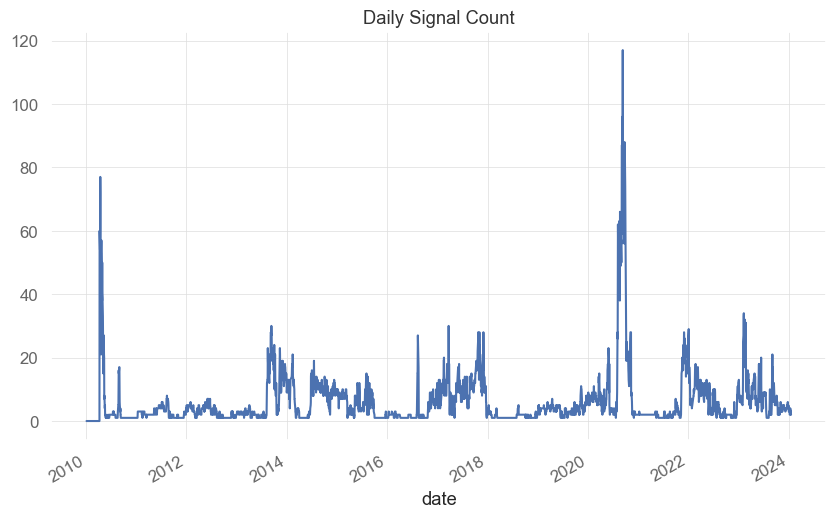

In [17]:
# reversal_signal>0 -> 買進
(reversal_signal>0).astype(int).sum(axis=1).plot( title = 'Daily Signal Count' )  # 計算reversal_signal>0的數量

## 選股方式 : 比例 -> 固定數量

In [18]:
reversal_signal = signal_topN(data=return_df, days=252, N = 10, min_counts=100, min_periods=63)  # 偵測反轉訊號
                                                                                                 # 固定只持有過去跌幅最多的前10檔股票
reversal_weights = normalize(data=reversal_signal)  # 根據訊號決定持有權重(標準化權重到0~1)
reversal_weights.fillna(0)  # nan填0避免影響到報酬率計算
strategy_gross_return,  strategy_net_return = backtest(data=return_df, weights=reversal_weights, transaction_cost=0.002)  # 回測反轉策略績效
                                                                                                                          # 由signal_topN計算出來的訊號<=0

<Axes: title={'center': 'Daily Signal Count'}, xlabel='date'>

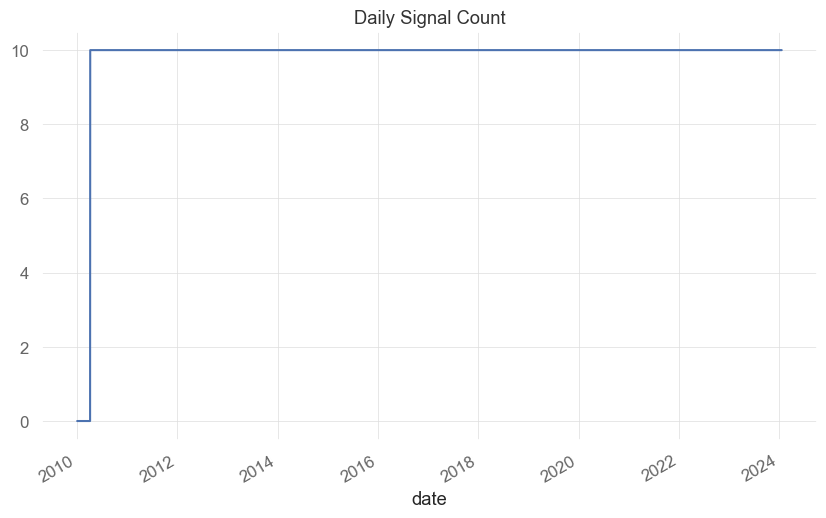

In [19]:
# 檢驗是否成功固定數量
(reversal_signal<0).astype(int).sum(axis=1).plot( title = 'Daily Signal Count' )  # 計算reversal_signal<0的數量

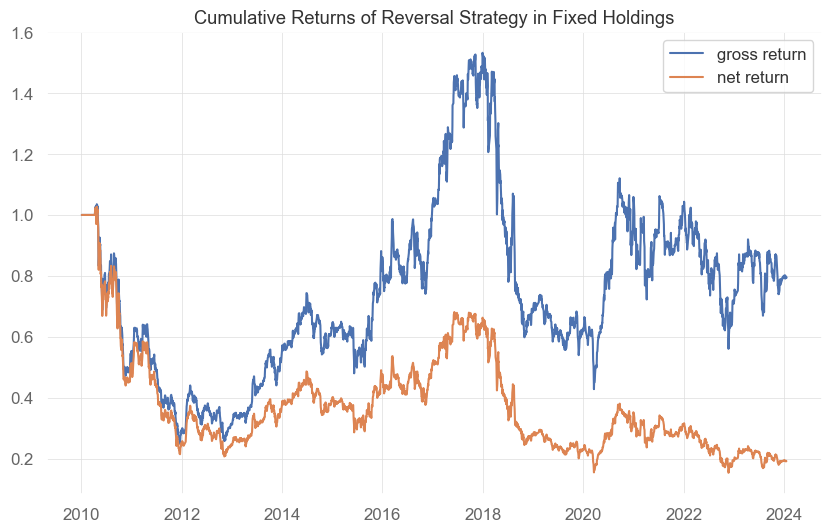

In [20]:
cum_strategy_gross_return = strategy_gross_return.add(1).cumprod()  # 累積毛報酬
cum_strategy_net_return = strategy_net_return.add(1).cumprod()  # 累積淨報酬
plt.title( 'Cumulative Returns of Reversal Strategy in Fixed Holdings' )
gross_return_plot = plt.plot(cum_strategy_gross_return, label='gross return')  # 累積毛報酬的圖
net_return_plot = plt.plot(cum_strategy_net_return, label='net return')  # 累積淨報酬的圖
plt.legend()

In [21]:
# 毛報酬
gross_mean = strategy_gross_return.mean()*252  # 策略(算術)平均報酬
gross_std = strategy_gross_return.std()*(252**0.5)  # 策略標準差
gross_sharpe = gross_mean / gross_std  # 策略sharpe
gross_series = pd.Series([gross_mean, gross_std, gross_sharpe], index=['mean', 'std', 'sharpe'])

# 淨報酬
net_mean = strategy_net_return.mean()*252  # 策略(算術)平均報酬
net_std = strategy_net_return.std()*(252**0.5)  # 策略標準差
net_sharpe = net_mean / net_std  # 策略sharpe
net_series = pd.Series([net_mean, net_std, net_sharpe], index=['mean', 'std', 'sharpe'])

pd.DataFrame( { 'gross':gross_series, 'net':net_series } )

,gross,net
mean,0.031439,-0.072370
std,0.310540,0.310197
sharpe,0.101240,-0.233303


<Axes: title={'center': 'Sharpe ratio for different time horizons in Fixed Holdings'}, xlabel='time horizons'>

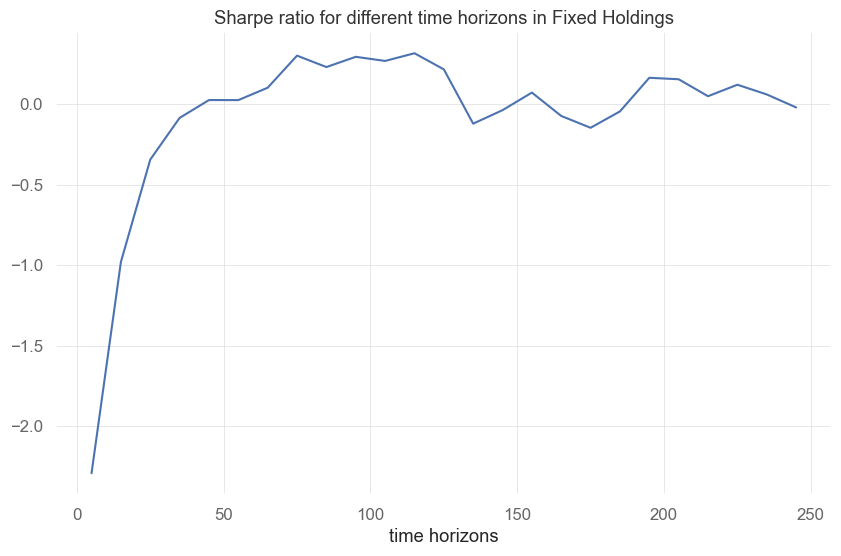

In [22]:
days_list = range(5,252,10)
sharpe_list = []
for d in days_list :
    reversal_signal_days_temp = signal_topN(data=return_df, days=d, N=10, min_counts=100, min_periods=d)  #偵測反轉訊號
    reversal_weights_days_temp = normalize(data=reversal_signal_days_temp)  # 根據訊號決定持有權重
    strategy_gross_return_temp,  strategy_net_return_temp  = backtest(data=return_df, weights=reversal_weights_days_temp, transaction_cost=0.002)  # 回測反轉策略績效
    net_mean_temp = strategy_net_return_temp.mean()*252# 策略(算術)平均報酬
    net_std_temp = strategy_net_return_temp.std()*(252**0.5)  # 策略標準差
    net_sharpe_temp = net_mean_temp / net_std_temp  # 策略sharpe
    sharpe_list.append(net_sharpe_temp)
pd.Series(sharpe_list, index = days_list).plot( title = 'Sharpe ratio for different time horizons in Fixed Holdings', xlabel = 'time horizons' )

In [23]:
# 依sharpe由大排到小
pd.Series(sharpe_list, index = days_list).sort_values(ascending=False)

115    0.317453
75     0.302631
95     0.295329
105    0.269590
85     0.231670
125    0.217403
195    0.165010
205    0.155787
225    0.121823
65     0.103219
155    0.073056
235    0.061602
215    0.050417
45     0.026599
55     0.026262
245   -0.019232
145   -0.036221
185   -0.043968
165   -0.072288
35    -0.084290
135   -0.120087
175   -0.145704
25    -0.343361
15    -0.979393
5     -2.292649
dtype: float64

# 使用最佳參數設定生成分析圖表

In [24]:
# 最佳參數設定(使sharpe ratio 最大)
reversal_signal_best = signal(data=return_df, days=75, threshold=0.9, min_counts=100, min_periods=75)  #偵測反轉訊號
reversal_weights_best = normalize(data=reversal_signal_best)  # 根據訊號決定持有權重(標準化權重到0~1)
reversal_weights_best.fillna(0)  # nan填0避免影響到報酬率計算
best_strategy_gross_return,  best_strategy_net_return = backtest(data=return_df, weights=reversal_weights_best, transaction_cost=0.002)  # 回測反轉策略績效

In [25]:
# 使用套件生成一個html檔案，包含精美分析圖表
qs.reports.html(best_strategy_net_return, benchmark=benchmark, output='Strategy performance analysis.html', titile='strategy', download_filename='strategy.html')

C:\Users\Administrator.USER-20180817XC\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Administrator.USER-20180817XC\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Administrator.USER-20180817XC\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future ver